# Introduction to Data Science (CS4661). Cal State Univ. LA, CS Dept.
## Dr. Mohammad Porhomayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Data Science in Python - Lab5

#### This is an introduction to some data sceince libraries/packages in python. Feel free to refer to the suggested resources and documentaries for more details.

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict

# Model Evaluation and Visualization 


###    More on LOGISTIC REGRESSION:
#### Importing the sklearn class (machine learning algorithm) that you would like to use for modeling:

In [4]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [5]:
# reading a CSV file directly from Web (or local drive), and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local drive:

#cancer_df = pd.read_csv('/Users/mpourho/Documents/CSU/Courses/CS4661/Datasets/Cancer.csv')
cancer_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/Cancer.csv')

# checking the dataset by printing every 10 lines:
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']

# print the first 5 rows
print(X.head())
print(y.head())

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

#### Splitting the Dataset:

In [7]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(120, 9)
(120,)
(30, 9)
(30,)


#### Defining (instantiating) an "object" from the sklearn class:

In [8]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()


#### Training Stage: Training a predictive model using the training dataset:


In [9]:
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)


LogisticRegression()

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [10]:
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1]


### Accuracy Evaluation:


In [11]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)


0.9333333333333333


## Estimating the Probability (likelihood) of happening an Event: 
##### As we mentioned before, Logistic Regression can also estimate the probability of happening the event (estimating the likelihood of each label) rather than just providing a binary prediction (see Logistic Regression lecture for more information).
##### Thus, we can adjust the True Positive Rate (TPR = Sensitivity) and False Positive Rate (FPR = False Alarm Rate) by changing the decision Threshold (see Model Evaluation lecture for more information).

In [12]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [13]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

6      0
3      0
113    1
12     1
24     1
129    1
25     1
108    1
128    0
45     1
48     1
42     1
35     1
5      1
85     1
54     1
41     0
96     0
144    0
89     1
77     0
74     0
115    0
94     0
87     1
29     1
2      0
127    0
44     0
125    1
Name: Malignant_Cancer, dtype: int64
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1]
[[9.09807758e-01 9.01922417e-02]
 [2.83281104e-04 9.99716719e-01]
 [4.90276653e-04 9.99509723e-01]
 [7.43561634e-02 9.25643837e-01]
 [4.94633299e-01 5.05366701e-01]
 [1.31204273e-04 9.99868796e-01]
 [8.17148236e-06 9.99991829e-01]
 [1.61491830e-02 9.83850817e-01]
 [9.55875551e-01 4.41244491e-02]
 [3.37108337e-02 9.66289166e-01]
 [1.54919533e-05 9.99984508e-01]
 [1.99599140e-05 9.99980040e-01]
 [1.20133678e-03 9.98798663e-01]
 [4.99805483e-06 9.99995002e-01]
 [9.10268592e-02 9.08973141e-01]
 [1.30977978e-02 9.86902202e-01]
 [9.91580974e-01 8.41902559e-03]
 [3.25204399e-01 6.74795601e-01]
 [9.94429615e-01 5.57038500e-03]
 [2.

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [14]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.         0.         0.07692308 0.07692308 0.15384615
 0.15384615 0.76923077 0.92307692 1.        ]
[0.         0.05882353 0.35294118 0.35294118 0.94117647 0.94117647
 1.         1.         1.         1.        ]


# AUC:

In [15]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9457013574660633


# ROC Curve:

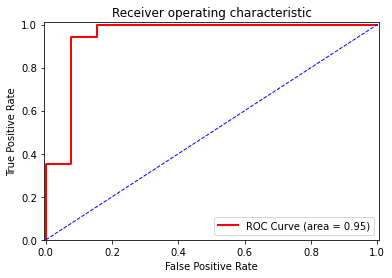

In [16]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Repeating the process with smaller number of features:

In [17]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols2 = ['Clump_Thickness','Mitoses']

# use the above list to select the features from the original DataFrame
X2 = cancer_df[feature_cols2] 

# select a Series of labels (the last column) from the DataFrame
y2 = cancer_df['Malignant_Cancer']

#Splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

my_logreg2 = LogisticRegression()
my_logreg2.fit(X_train2,y_train2)

# Predicting the Binary Label:
y_predict_lr2 = my_logreg2.predict(X_test2)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr2 = my_logreg2.predict_proba(X_test2)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

0.8868778280542986


### Comparing the ROC Curves:

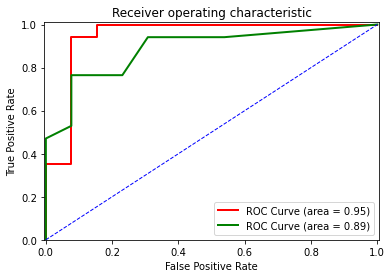

In [18]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# K-MEANS and
# More on Visualization: Plotting KMeans Clustering Results

In [ ]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

# KMeans Clustering for iris dataset:
iris_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/iris.csv')

#feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
feature_cols = ['sepal_length','petal_width']
X = iris_df[feature_cols]

# Clustering:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(X)

# Assigned Labels after clustering: 
labels = my_KMeans.labels_

# Centers of the clusters:
centers = my_KMeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([2, 10])
plt.ylim([-0.5, 3])

# Labels, Title, Legend:
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('KMeans for IRIS dataset')

plt.show